In [1]:
!pip install xgboost

In [2]:
import pandas as pd
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

In [4]:
loc = "http://football-data.co.uk/mmz4281/{}/E0.csv"
dataset = pd.DataFrame()
years = ['1314','1415','1516','1617']
for x in range(1,5):
    r1 = pd.read_csv(loc.format(years[x-1]), error_bad_lines=False, escapechar='\n')
    r1 = r1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A','WHH','WHD','WHA','IWH','IWD','IWA']]
    dataset = dataset.append(r1)

In [5]:
dataset.shape

(1521, 29)

In [6]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AR,B365H,B365D,B365A,WHH,WHD,WHA,IWH,IWD,IWA
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,0.0,1.44,4.75,8.0,1.36,4.8,8.50,1.37,4.6,7.5
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,0.0,1.40,5.00,9.5,1.36,4.6,9.00,1.40,4.4,7.3
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,0.0,3.20,3.40,2.4,3.10,3.3,2.30,2.90,3.3,2.3
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,0.0,2.30,3.40,3.4,2.20,3.3,3.30,2.20,3.2,3.2
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,0.0,4.20,3.50,2.0,4.00,3.4,1.91,4.20,3.5,1.8


In [7]:
import os
from operator import itemgetter
import numpy as np

In [8]:
dataset = dataset.dropna()

In [9]:
Team_Names=np.unique(dataset[['HomeTeam', 'AwayTeam']].values)
Team_Names

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Burnley', 'Cardiff',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull',
       'Leicester', 'Liverpool', 'Man City', 'Man United',
       'Middlesbrough', 'Newcastle', 'Norwich', 'QPR', 'Southampton',
       'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford',
       'West Brom', 'West Ham'], dtype=object)

In [10]:
Team_Names_Assigning_Default_Values={i : 1500 for i in Team_Names}
Team_Names_Assigning_Default_Values

{'Arsenal': 1500,
 'Aston Villa': 1500,
 'Bournemouth': 1500,
 'Burnley': 1500,
 'Cardiff': 1500,
 'Chelsea': 1500,
 'Crystal Palace': 1500,
 'Everton': 1500,
 'Fulham': 1500,
 'Hull': 1500,
 'Leicester': 1500,
 'Liverpool': 1500,
 'Man City': 1500,
 'Man United': 1500,
 'Middlesbrough': 1500,
 'Newcastle': 1500,
 'Norwich': 1500,
 'QPR': 1500,
 'Southampton': 1500,
 'Stoke': 1500,
 'Sunderland': 1500,
 'Swansea': 1500,
 'Tottenham': 1500,
 'Watford': 1500,
 'West Brom': 1500,
 'West Ham': 1500}

In [11]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AR,B365H,B365D,B365A,WHH,WHD,WHA,IWH,IWD,IWA
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,0.0,1.44,4.75,8.0,1.36,4.8,8.50,1.37,4.6,7.5
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,0.0,1.40,5.00,9.5,1.36,4.6,9.00,1.40,4.4,7.3
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,0.0,3.20,3.40,2.4,3.10,3.3,2.30,2.90,3.3,2.3
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,0.0,2.30,3.40,3.4,2.20,3.3,3.30,2.20,3.2,3.2
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,0.0,4.20,3.50,2.0,4.00,3.4,1.91,4.20,3.5,1.8


In [12]:
Team_Names_Assigning_Default_Values.keys()

dict_keys(['Arsenal', 'Aston Villa', 'Bournemouth', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Hull', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Middlesbrough', 'Newcastle', 'Norwich', 'QPR', 'Southampton', 'Stoke', 'Sunderland', 'Swansea', 'Tottenham', 'Watford', 'West Brom', 'West Ham'])

In [13]:
import math
def Points(data):
    I=25
    FTR=str(data.FTR)
    HomeTeam=str(data.HomeTeam)
    AwayTeam=str(data.AwayTeam)
    Pbefore_H=int(Team_Names_Assigning_Default_Values[HomeTeam])
    Pbefore_A=int(Team_Names_Assigning_Default_Values[AwayTeam]) 
    
    if FTR == "H":
            
        Points_of_HomeTeam= Pbefore_H + I * (1- (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
        Points_of_AwayTeam= Pbefore_A +  I * (0- (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1)))
        
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for l in Team_Names_Assigning_Default_Values:
            if l == HomeTeam :
                Team_Names_Assigning_Default_Values[l] = Points_of_HomeTeam
        for j in Team_Names_Assigning_Default_Values:
            if j == AwayTeam :
                Team_Names_Assigning_Default_Values[j] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A])))
    elif FTR == "A":
            
        Points_of_AwayTeam= Pbefore_A + I * (1- (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1)))
        Points_of_HomeTeam= Pbefore_H + I * (0- (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
       
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for m in Team_Names_Assigning_Default_Values:
            if m == HomeTeam :
                Team_Names_Assigning_Default_Values[m] = Points_of_HomeTeam
        for n in Team_Names_Assigning_Default_Values:
            if n == AwayTeam :
                Team_Names_Assigning_Default_Values[n] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A])))  
    else:
        
        Points_of_AwayTeam= Pbefore_A +  I * (0.5 - (1/(10 **(-((Team_Names_Assigning_Default_Values[AwayTeam])-(Team_Names_Assigning_Default_Values[HomeTeam]))/600)+1))) 
        Points_of_HomeTeam= Pbefore_H + I * (0.5 - (1/(10 **(-((Team_Names_Assigning_Default_Values[HomeTeam])-(Team_Names_Assigning_Default_Values[AwayTeam]))/600)+1)))
       
        Pafter_H=int(Points_of_HomeTeam)
        Pafter_A=int(Points_of_AwayTeam)
        
        for p in Team_Names_Assigning_Default_Values:
            if p == HomeTeam :
                Team_Names_Assigning_Default_Values[p] = Points_of_HomeTeam
        for q in Team_Names_Assigning_Default_Values:
            if q == AwayTeam :
                Team_Names_Assigning_Default_Values[q] = Points_of_AwayTeam
                        
           
        return((pd.Series([Pbefore_H,Pbefore_A,Pafter_H,Pafter_A]))) 
dataset[["Pbefore_H","Pbefore_A","Pafter_H","Pafter_A"]]=dataset.apply(Points,axis=1)
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,1.36,4.8,8.50,1.37,4.6,7.5,1487,1512,1475,1523
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,1.36,4.6,9.00,1.40,4.4,7.3,1500,1500,1512,1487
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,3.10,3.3,2.30,2.90,3.3,2.3,1500,1500,1500,1500
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,2.20,3.3,3.30,2.20,3.2,3.2,1500,1500,1487,1512
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,4.00,3.4,1.91,4.20,3.5,1.8,1500,1500,1487,1512


In [14]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,1.36,4.8,8.50,1.37,4.6,7.5,1487,1512,1475,1523
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,...,1.36,4.6,9.00,1.40,4.4,7.3,1500,1500,1512,1487
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,...,3.10,3.3,2.30,2.90,3.3,2.3,1500,1500,1500,1500
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,...,2.20,3.3,3.30,2.20,3.2,3.2,1500,1500,1487,1512
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,...,4.00,3.4,1.91,4.20,3.5,1.8,1500,1500,1487,1512


In [15]:
#dataset.HomeTeam.unique()
dataset[dataset['HomeTeam']=='Arsenal'].head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,Pafter_H,Pafter_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,...,1.36,4.8,8.5,1.37,4.6,7.5,1487,1512,1475,1523
27,Arsenal,Tottenham,1.0,0.0,H,1.0,0.0,H,12.0,14.0,...,2.10,3.3,3.5,2.00,3.4,3.5,1488,1523,1501,1509
46,Arsenal,Stoke,3.0,1.0,H,2.0,1.0,H,16.0,9.0,...,1.40,4.5,10.0,1.35,4.8,7.6,1512,1510,1524,1497
70,Arsenal,Norwich,4.0,1.0,H,1.0,0.0,H,20.0,12.0,...,1.30,5.0,11.0,1.27,5.2,10.0,1534,1475,1545,1463
90,Arsenal,Liverpool,2.0,0.0,H,1.0,0.0,H,12.0,12.0,...,2.30,3.0,3.4,2.20,3.3,3.1,1554,1549,1566,1536


In [16]:
dataset.HomeTeam.unique()

array(['Arsenal', 'Liverpool', 'Norwich', 'Sunderland', 'Swansea',
       'West Brom', 'West Ham', 'Chelsea', 'Crystal Palace', 'Man City',
       'Aston Villa', 'Everton', 'Fulham', 'Hull', 'Newcastle',
       'Southampton', 'Stoke', 'Cardiff', 'Tottenham', 'Man United',
       'Leicester', 'QPR', 'Burnley', 'Bournemouth', 'Watford',
       'Middlesbrough'], dtype=object)

In [17]:
train_dup_1 = pd.DataFrame()
for x in dataset.HomeTeam.unique():
    train_dup_1 = train_dup_1.append(dataset[dataset['HomeTeam'] == x][['HomeTeam','AwayTeam','HS', 'HST', 'HF', 'HC', 'HY',
                       'HR', 'Pbefore_H']].ewm(com=0.5).mean()) 

In [18]:
train_dup_2 = pd.DataFrame()
for x in dataset.AwayTeam.unique():
    train_dup_2 = train_dup_2.append(dataset[dataset['AwayTeam'] == x][['HomeTeam','AwayTeam','AS', 'AST', 'AF', 'AC', 'AY',
                       'AR', 'Pbefore_A']].ewm(com=0.5).mean()) 

In [19]:
rem_dup = dataset.drop(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
                       'HR', 'AR', 'Pbefore_H', 'Pbefore_A','Pafter_H','Pafter_A'],axis=1)

In [20]:
train_dup = pd.concat((train_dup_1.sort_index(by=['HomeTeam','AwayTeam']),train_dup_2.sort_index(by=['HomeTeam','AwayTeam'])),axis=1)

In [21]:
train_dup = pd.concat((rem_dup.sort_index(by=['HomeTeam','AwayTeam']),train_dup),axis=1)

In [22]:
train_dup.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,...,Pbefore_H,HomeTeam,AwayTeam,AS,AST,AF,AC,AY,AR,Pbefore_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,1.44,4.75,...,1487.000000,Arsenal,Aston Villa,9.000000,4.000000,18.000000,3.000000,5.000000,0.000000,1512.000000
228,Arsenal,Aston Villa,5.0,0.0,H,1.0,0.0,H,1.25,6.50,...,1616.930645,Arsenal,Aston Villa,9.761748,1.876801,9.346100,6.083185,1.932318,0.246914,1374.383761
370,Arsenal,Aston Villa,4.0,0.0,H,1.0,0.0,H,1.17,9.00,...,1644.892103,Arsenal,Aston Villa,5.745124,1.915755,7.349601,3.941200,1.474175,0.223137,1219.461109
180,Arsenal,Bournemouth,2.0,0.0,H,1.0,0.0,H,1.44,4.75,...,1667.805816,Arsenal,Bournemouth,11.888159,4.050840,8.588674,4.274489,0.365940,0.000000,1458.006944
126,Arsenal,Bournemouth,3.0,1.0,H,1.0,1.0,D,1.40,5.00,...,1674.302191,Arsenal,Bournemouth,9.471118,2.745643,11.690994,8.256308,3.962599,0.000915,1415.055176


In [23]:
model_data = train_dup.dropna()

In [24]:
model_data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,...,Pbefore_H,HomeTeam,AwayTeam,AS,AST,AF,AC,AY,AR,Pbefore_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,1.44,4.75,...,1487.000000,Arsenal,Aston Villa,9.000000,4.000000,18.000000,3.000000,5.000000,0.000000,1512.000000
228,Arsenal,Aston Villa,5.0,0.0,H,1.0,0.0,H,1.25,6.50,...,1616.930645,Arsenal,Aston Villa,9.761748,1.876801,9.346100,6.083185,1.932318,0.246914,1374.383761
370,Arsenal,Aston Villa,4.0,0.0,H,1.0,0.0,H,1.17,9.00,...,1644.892103,Arsenal,Aston Villa,5.745124,1.915755,7.349601,3.941200,1.474175,0.223137,1219.461109
180,Arsenal,Bournemouth,2.0,0.0,H,1.0,0.0,H,1.44,4.75,...,1667.805816,Arsenal,Bournemouth,11.888159,4.050840,8.588674,4.274489,0.365940,0.000000,1458.006944
126,Arsenal,Bournemouth,3.0,1.0,H,1.0,1.0,D,1.40,5.00,...,1674.302191,Arsenal,Bournemouth,9.471118,2.745643,11.690994,8.256308,3.962599,0.000915,1415.055176


In [25]:
model_data.shape

(1519, 35)

In [26]:
le = LabelEncoder()
model_data['FTR'] = le.fit_transform(model_data['FTR'].astype(str))

X1 = model_data.drop(['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTR','HTHG','HTAG'], axis=1)
Y1 = model_data.FTR

In [27]:
X1.head()

,B365H,B365D,B365A,WHH,WHD,WHA,IWH,IWD,IWA,HS,...,HY,HR,Pbefore_H,AS,AST,AF,AC,AY,AR,Pbefore_A
0,1.44,4.75,8.0,1.36,4.8,8.5,1.37,4.6,7.5,16.000000,...,4.000000,1.000000e+00,1487.000000,9.000000,4.000000,18.000000,3.000000,5.000000,0.000000,1512.000000
228,1.25,6.50,15.0,1.29,5.0,12.0,1.27,5.2,10.0,13.567387,...,0.129995,7.407407e-02,1616.930645,9.761748,1.876801,9.346100,6.083185,1.932318,0.246914,1374.383761
370,1.17,9.00,17.0,1.14,7.5,19.0,1.17,6.5,14.0,15.717254,...,0.234914,1.016105e-04,1644.892103,5.745124,1.915755,7.349601,3.941200,1.474175,0.223137,1219.461109
180,1.44,4.75,8.0,1.36,4.8,8.5,1.42,4.3,7.0,12.109863,...,1.427984,5.735944e-10,1667.805816,11.888159,4.050840,8.588674,4.274489,0.365940,0.000000,1458.006944
126,1.40,5.00,9.0,1.40,4.8,8.5,1.35,5.3,8.0,15.239011,...,2.304634,2.469140e-02,1674.302191,9.471118,2.745643,11.690994,8.256308,3.962599,0.000915,1415.055176


In [28]:
X1.shape

(1519, 23)

In [29]:
Y1.shape

(1519,)

In [30]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=123)

In [31]:
# Create a random forest classifier
clf1 = RandomForestClassifier(n_estimators=5000, random_state=0, n_jobs=-1)

# Train the classifier
clf1.fit(X1_train, Y1_train)

# Print the name and gini importance of each feature
for feature in zip(X1.columns, clf1.feature_importances_):
    print(feature)

('B365H', 0.042018047649435064)
('B365D', 0.023342380877478242)
('B365A', 0.03888657384983606)
('WHH', 0.038399028966598976)
('WHD', 0.023443761324841078)
('WHA', 0.04067158685323002)
('IWH', 0.037919160003218585)
('IWD', 0.021197517457744175)
('IWA', 0.04177538341337131)
('HS', 0.046121951600294295)
('HST', 0.08723866197685906)
('HF', 0.04518752317917644)
('HC', 0.054280201835733274)
('HY', 0.0448623987135084)
('HR', 0.03222227624786785)
('Pbefore_H', 0.044551365339807456)
('AS', 0.04739764256727192)
('AST', 0.07423318439076053)
('AF', 0.0458823237353468)
('AC', 0.04759106347891215)
('AY', 0.04430982747314058)
('AR', 0.03534495699612078)
('Pbefore_A', 0.04312318206944652)


In [33]:
df = train_dup.copy()
df=df.dropna()

In [34]:
df = df.loc[:,~df.columns.duplicated()]

In [35]:
#df=df.drop(df.iloc[:,0:2],axis=1)

In [36]:
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'IWH', 'IWD', 'IWA',
       'HS', 'HST', 'HF', 'HC', 'HY', 'HR', 'Pbefore_H', 'AS', 'AST', 'AF',
       'AC', 'AY', 'AR', 'Pbefore_A'],
      dtype='object')

In [37]:
table = pd.DataFrame(columns=('Team','HTGS','ATGS','HAS','AAS','HTGC','ATGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 1519.0
avg_away_scored = df.FTAG.sum() / 1519.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_home_scored)

1.5345622119815667


In [38]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [39]:
#res_home.get_group('Arsenal')
#res_home.size()
#res_home.filter(lambda x: any(x['HomeTeam'] == 'Arsenal'))

In [40]:
table.Team = res_home.groups.keys()
table.HTGS = res_home.FTHG.sum().values
table.HTGC = res_home.FTAG.sum().values
table.ATGS = res_away.FTAG.sum().values
table.ATGC = res_away.FTHG.sum().values
#19 Home matches for each team per season and 4 seasons therefore 76 home matches and 76 away matches
table.HAS = (table.HTGS / 76.0) / avg_home_scored
table.AAS = (table.ATGS / 76.0) / avg_away_scored
table.HDS = (table.HTGC / 76.0) / avg_home_conceded
table.ADS = (table.ATGC / 76.0) / avg_away_conceded

table.head()

,Team,HTGS,ATGS,HAS,AAS,HTGC,ATGC,HDS,ADS
0,Arsenal,147.0,131.0,1.260431,1.469291,52.0,104.0,0.583230,0.891734
1,Aston Villa,54.0,43.0,0.463016,0.482286,89.0,105.0,0.998221,0.900308
2,Bournemouth,58.0,42.0,0.497313,0.471070,63.0,71.0,0.706606,0.608780
3,Burnley,40.0,27.0,0.342975,0.302831,41.0,67.0,0.459854,0.574482
4,Cardiff,20.0,12.0,0.171487,0.134592,35.0,39.0,0.392559,0.334400


In [41]:
df.shape

(1519, 31)

In [42]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:32]

In [43]:
feature_table=feature_table.dropna()

In [44]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,...,HY,HR,Pbefore_H,AS,AST,AF,AC,AY,AR,Pbefore_A
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,1.44,4.75,...,4.000000,1.000000e+00,1487.000000,9.000000,4.000000,18.000000,3.000000,5.000000,0.000000,1512.000000
228,Arsenal,Aston Villa,5.0,0.0,H,1.0,0.0,H,1.25,6.50,...,0.129995,7.407407e-02,1616.930645,9.761748,1.876801,9.346100,6.083185,1.932318,0.246914,1374.383761
370,Arsenal,Aston Villa,4.0,0.0,H,1.0,0.0,H,1.17,9.00,...,0.234914,1.016105e-04,1644.892103,5.745124,1.915755,7.349601,3.941200,1.474175,0.223137,1219.461109
180,Arsenal,Bournemouth,2.0,0.0,H,1.0,0.0,H,1.44,4.75,...,1.427984,5.735944e-10,1667.805816,11.888159,4.050840,8.588674,4.274489,0.365940,0.000000,1458.006944
126,Arsenal,Bournemouth,3.0,1.0,H,1.0,1.0,D,1.40,5.00,...,2.304634,2.469140e-02,1674.302191,9.471118,2.745643,11.690994,8.256308,3.962599,0.000915,1415.055176


In [45]:
#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','Pbefore_H','Pbefore_A']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A,HAS,HDS,AAS,ADS
0,Arsenal,Aston Villa,A,4.000000,4.000000,4.000000,3.000000,1.44,8.0,4.75,...,8.5,1.37,4.6,7.5,1487.000000,1512.000000,1.260431,0.58323,0.482286,0.900308
228,Arsenal,Aston Villa,H,7.241879,1.876801,7.458775,6.083185,1.25,15.0,6.50,...,12.0,1.27,5.2,10.0,1616.930645,1374.383761,1.260431,0.58323,0.482286,0.900308
370,Arsenal,Aston Villa,H,6.118881,1.915755,5.383992,3.941200,1.17,17.0,9.00,...,19.0,1.17,6.5,14.0,1644.892103,1219.461109,1.260431,0.58323,0.482286,0.900308
180,Arsenal,Bournemouth,H,5.796944,4.050840,7.364652,4.274489,1.44,8.0,4.75,...,8.5,1.42,4.3,7.0,1667.805816,1458.006944,1.260431,0.58323,0.471070,0.608780
126,Arsenal,Bournemouth,H,3.016973,2.745643,4.369174,8.256308,1.40,9.0,5.00,...,8.5,1.35,5.3,8.0,1674.302191,1415.055176,1.260431,0.58323,0.471070,0.608780


In [46]:
#feature_table[(feature_table['HomeTeam']=='Arsenal') & (feature_table['AwayTeam']=='Aston Villa')]

In [47]:
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [48]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.tail()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,IWH,IWD,IWA,Pbefore_H,Pbefore_A,HAS,HDS,AAS,ADS,Result
37,West Ham,Watford,A,3.812205,6.195126,3.712690,3.412872,1.91,4.50,3.60,...,1.80,3.50,4.2,1496.610527,1413.965466,0.883159,1.132812,0.392559,0.600205,-1
185,West Ham,West Brom,D,5.577124,5.767681,4.382469,4.362451,2.38,3.25,3.40,...,2.20,3.30,3.1,1418.360046,1449.150454,0.883159,1.132812,0.706606,0.926031,0
199,West Ham,West Brom,D,3.253718,3.429061,2.486815,2.213391,1.85,4.50,3.75,...,1.85,3.45,4.0,1468.456901,1369.556355,0.883159,1.132812,0.706606,0.926031,0
139,West Ham,West Brom,D,5.694531,2.410757,4.765469,1.928141,2.05,4.00,3.50,...,2.00,3.30,3.6,1442.774058,1420.849609,0.883159,1.132812,0.706606,0.926031,0
246,West Ham,West Brom,D,3.232839,3.199898,5.412814,3.903533,2.25,3.60,3.30,...,2.10,3.40,3.5,1477.002245,1447.985206,0.883159,1.132812,0.706606,0.926031,0


In [49]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','Pbefore_H','Pbefore_A']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','B365H','B365A','B365D','WHH','WHD','WHA','IWH','IWD','IWA','HST','AST','HC','AC','Pbefore_H','Pbefore_A']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS,B365H,B365A,B365D,WHH,WHD,WHA,IWH,IWD,IWA,Pbefore_H,Pbefore_A
37,0.883159,1.132812,0.392559,0.600205,1.91,4.50,3.60,1.91,3.2,4.50,1.80,3.50,4.2,1496.610527,1413.965466
185,0.883159,1.132812,0.706606,0.926031,2.38,3.25,3.40,2.40,3.0,3.20,2.20,3.30,3.1,1418.360046,1449.150454
199,0.883159,1.132812,0.706606,0.926031,1.85,4.50,3.75,1.85,3.3,4.50,1.85,3.45,4.0,1468.456901,1369.556355
139,0.883159,1.132812,0.706606,0.926031,2.05,4.00,3.50,2.05,3.3,3.75,2.00,3.30,3.6,1442.774058,1420.849609
246,0.883159,1.132812,0.706606,0.926031,2.25,3.60,3.30,2.25,3.2,3.60,2.10,3.40,3.5,1477.002245,1447.985206


,HAS,HDS,AAS,ADS,B365H,B365A,B365D,WHH,WHD,WHA,IWH,IWD,IWA,HST,AST,HC,AC,Pbefore_H,Pbefore_A
37,0.883159,1.132812,0.392559,0.600205,1.91,4.50,3.60,1.91,3.2,4.50,1.80,3.50,4.2,3.812205,6.195126,3.712690,3.412872,1496.610527,1413.965466
185,0.883159,1.132812,0.706606,0.926031,2.38,3.25,3.40,2.40,3.0,3.20,2.20,3.30,3.1,5.577124,5.767681,4.382469,4.362451,1418.360046,1449.150454
199,0.883159,1.132812,0.706606,0.926031,1.85,4.50,3.75,1.85,3.3,4.50,1.85,3.45,4.0,3.253718,3.429061,2.486815,2.213391,1468.456901,1369.556355
139,0.883159,1.132812,0.706606,0.926031,2.05,4.00,3.50,2.05,3.3,3.75,2.00,3.30,3.6,5.694531,2.410757,4.765469,1.928141,1442.774058,1420.849609
246,0.883159,1.132812,0.706606,0.926031,2.25,3.60,3.30,2.25,3.2,3.60,2.10,3.40,3.5,3.232839,3.199898,5.412814,3.903533,1477.002245,1447.985206


In [50]:
np.unique(y_train)

array([-1,  0,  1], dtype=int64)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [52]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.5127634521282134  :  0.5258920366841247
NB alpha  50   0.5134471488776124  :  0.5226369090999625
NB alpha  100   0.5114560369919381  :  0.5246236640668498
NB alpha  150   0.5200264357461987  :  0.5318650328409826
NB alpha  200   0.5213769108200966  :  0.5285668453191981
NB alpha  250   0.5220522332320867  :  0.5338693852331009
NB alpha  300   0.51940775327844  :  0.5285800858256418
NB alpha  350   0.5233467473620838  :  0.5325363378343511
NB alpha  400   0.5253118874851186  :  0.5358732283749712
NB alpha  450   0.5279436361825697  :  0.5384877191473567
NB alpha  500   0.5312290924481584  :  0.5411194678448077
NB alpha  550   0.5378341813293016  :  0.5470535912327478
NB alpha  600   0.5384746483909956  :  0.5457247310027025
NB alpha  650   0.5411105842571511  :  0.5516459533843638
NB alpha  700   0.5443915138538701  :  0.5549441409061485
NB alpha  750   0.5457289181714069  :  0.5569308958730359
NB alpha  800   0.5457289181714069  :  0.5543035040943719
NB alpha  850   0.5

In [53]:
from xgboost import XGBClassifier
clf = [MultinomialNB(alpha=850), XGBClassifier(), RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) ,SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'XGBoost', 'RandomForest','SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,5):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.5470534214826651  :  0.5556192935680563
XGBoost  :  0.48219683766912763  :  0.5587157614083372
RandomForest  :  0.4678555019396775  :  0.5158892301494253
SVM  :  0.5456769746461277  :  0.5969961591214641
Log regres  :  0.5449545748778932  :  0.6009867572302218


In [54]:
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,B365H,B365A,B365D,...,IWH,IWD,IWA,Pbefore_H,Pbefore_A,HAS,HDS,AAS,ADS,Result
0,Arsenal,Aston Villa,A,4.000000,4.000000,4.000000,3.000000,1.44,8.0,4.75,...,1.37,4.6,7.5,1487.000000,1512.000000,1.260431,0.58323,0.482286,0.900308,-1
228,Arsenal,Aston Villa,H,7.241879,1.876801,7.458775,6.083185,1.25,15.0,6.50,...,1.27,5.2,10.0,1616.930645,1374.383761,1.260431,0.58323,0.482286,0.900308,1
370,Arsenal,Aston Villa,H,6.118881,1.915755,5.383992,3.941200,1.17,17.0,9.00,...,1.17,6.5,14.0,1644.892103,1219.461109,1.260431,0.58323,0.482286,0.900308,1
180,Arsenal,Bournemouth,H,5.796944,4.050840,7.364652,4.274489,1.44,8.0,4.75,...,1.42,4.3,7.0,1667.805816,1458.006944,1.260431,0.58323,0.471070,0.608780,1
126,Arsenal,Bournemouth,H,3.016973,2.745643,4.369174,8.256308,1.40,9.0,5.00,...,1.35,5.3,8.0,1674.302191,1415.055176,1.260431,0.58323,0.471070,0.608780,1


In [55]:
#import numpy as np
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#mod = sm.OLS(y_train,X_train_2)
#results = mod.fit()
#print(results.summary())

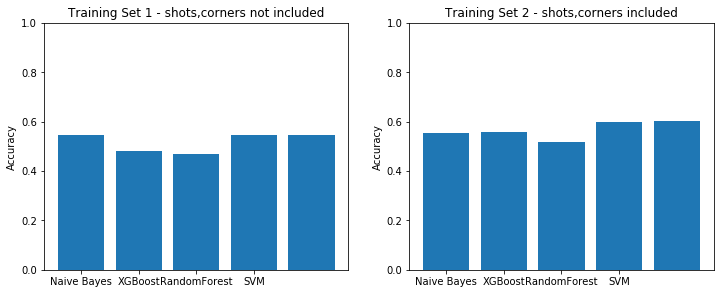

In [56]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,5),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,5),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);

In [57]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_train_2 = normalize(X_train_2)
pd.set_option('display.expand_frame_repr', False)

display(X_train)

array([[5.94332862e-04, 2.75011166e-04, 2.27413079e-04, ...,
        3.53648455e-03, 7.01167003e-01, 7.12955285e-01],
       [5.93911405e-04, 2.74816148e-04, 2.27251815e-04, ...,
        4.71196898e-03, 7.61892704e-01, 6.47605364e-01],
       [6.15482926e-04, 2.84797775e-04, 2.35505853e-04, ...,
        6.83635808e-03, 8.03219387e-01, 5.95476629e-01],
       ...,
       [4.39815366e-04, 5.64142893e-04, 3.51891112e-04, ...,
        1.99200882e-03, 7.31294775e-01, 6.82042085e-01],
       [4.36134599e-04, 5.59421642e-04, 3.48946173e-04, ...,
        1.77780412e-03, 7.12491574e-01, 7.01664526e-01],
       [4.26976769e-04, 5.47675066e-04, 3.41619100e-04, ...,
        1.69212779e-03, 7.14079012e-01, 7.00050287e-01]])

In [58]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.457543806837986  :  0.457543806837986
NB alpha  50   0.457543806837986  :  0.457543806837986
NB alpha  100   0.457543806837986  :  0.457543806837986
NB alpha  150   0.457543806837986  :  0.457543806837986
NB alpha  200   0.457543806837986  :  0.457543806837986
NB alpha  250   0.457543806837986  :  0.457543806837986
NB alpha  300   0.457543806837986  :  0.457543806837986
NB alpha  350   0.457543806837986  :  0.457543806837986
NB alpha  400   0.457543806837986  :  0.457543806837986
NB alpha  450   0.457543806837986  :  0.457543806837986
NB alpha  500   0.457543806837986  :  0.457543806837986
NB alpha  550   0.457543806837986  :  0.457543806837986
NB alpha  600   0.457543806837986  :  0.457543806837986
NB alpha  650   0.457543806837986  :  0.457543806837986
NB alpha  700   0.457543806837986  :  0.457543806837986
NB alpha  750   0.457543806837986  :  0.457543806837986
NB alpha  800   0.457543806837986  :  0.457543806837986
NB alpha  850   0.457543806837986  :  0.45754380683

In [59]:
#With Normalization

clf = [MultinomialNB(alpha=850), XGBClassifier(), RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) ,SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'XGBoost', 'RandomForest','SVM', 'Log regres']


mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,5):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.457543806837986  :  0.457543806837986
XGBoost  :  0.5073923897642963  :  0.5653379384644635
RandomForest  :  0.4698380697378607  :  0.5185343891034028
SVM  :  0.48381404670616945  :  0.48381404670616945
Log regres  :  0.5035736919058633  :  0.5035736919058633


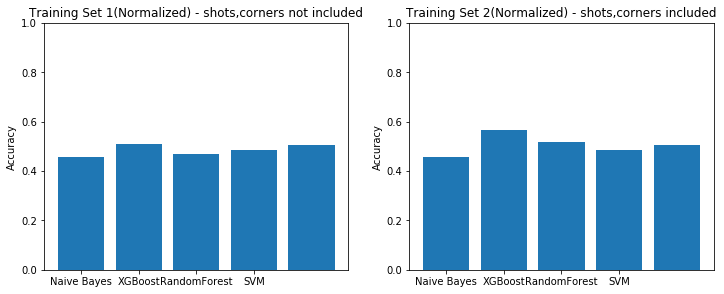

In [61]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,5),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1(Normalized) - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,5),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2(Normalized) - shots,corners included")
ax2.set_xticklabels(labels);
